In [ ]:
import numpy as np
from neo.io import Spike2IO
from matplotlib import pyplot as plt

In [ ]:
%matplotlib notebook

In [34]:
f_name = '/mnt/data/kkarbasi/SimpleSpike-Felix/Felix 2006.09.06/Felix 2006.09.06 1313 List.smr'
# f_name = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2010_5_types_of_saccades/Buckley/BuckleyUnit25 2008.09.12/Buckley25Beh_2008.09.12_1754_Adapt.smr'
# f_name = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2010_Adapt/Buckley_12deg/B091608/B091608_1218_Adapt.smr'
reader = Spike2IO(filename=f_name)

In [35]:
data = reader.read()
print('Number of blocks: {}'.format(len(data)))

Number of blocks: 1


In [36]:
data

[Block with 1 segments, 13 channel_indexes
 annotations: {'system_id': 4}
 file_origin: '/mnt/data/kkarbasi/SimpleSpike-Felix/Felix 2006.09.06/Felix 2006.09.06 1313 List.smr'
 # segments (N=1)
 0: Segment with 10 analogsignals, 8 events, 3 spiketrains
    annotations: {'system_id': 4}
    # analogsignals (N=10)
    0: AnalogSignal with 1 channels of length 744858; units deg; datatype float32 
       name: 'Channel bundle (HE) '
       annotations: {'channel_ids': array([1]),
         'channel_names': array([u'HE'], dtype='<U64')}
       sampling rate: 1000.0
       time: 1e-05 to 744.85801
    1: AnalogSignal with 1 channels of length 744858; units deg; datatype float32 
       name: 'Channel bundle (VE) '
       annotations: {'channel_ids': array([2]),
         'channel_names': array([u'VE'], dtype='<U64')}
       sampling rate: 1000.0
       time: 3e-05 to 744.85803
    2: AnalogSignal with 1 channels of length 744858; units deg; datatype float32 
       name: 'Channel bundle (HT) '


In [37]:
data_block = data[0]
print('Segments: {}'.format(data_block.size['segments']))
print('Number of channels: {}'.format(data_block.size['channel_indexes']))

Segments: 1
Number of channels: 13


In [38]:
seg = data_block.segments[0]

print('There are {} AnalogSignals (channels) in this segment:'.format(len(seg.analogsignals)))

for i, asig in enumerate(seg.analogsignals):
    print('{} -- Channel id: {} -- Channle name: {}'.format(i, asig.annotations['channel_ids'][0] ,asig.annotations['channel_names'][0]))

print('')
print('There are {} spike trains in this segment:'.format(len(seg.spiketrains)))

for st in seg.spiketrains:
    print('Channel id: {}'.format(st.annotations['id']))

There are 10 AnalogSignals (channels) in this segment:
0 -- Channel id: 1 -- Channle name: HE
1 -- Channel id: 2 -- Channle name: VE
2 -- Channel id: 3 -- Channle name: HT
3 -- Channel id: 4 -- Channle name: VT
4 -- Channel id: 7 -- Channle name: H2 Targ
5 -- Channel id: 8 -- Channle name: V2 Targ
6 -- Channel id: 9 -- Channle name: Aux 1
7 -- Channel id: 10 -- Channle name: Aux 2
8 -- Channel id: 27 -- Channle name: Spike Den
9 -- Channel id: 0 -- Channle name: Unit

There are 3 spike trains in this segment:
Channel id: ch25#4
Channel id: ch28#5
Channel id: ch29#4


In [39]:
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle

output_filename = './test4.pkl'
with open(output_filename, 'wb') as output:
    print('writing {} ...'.format(output_filename))
    pickle.dump(data_block, output, pickle.HIGHEST_PROTOCOL)    


writing ./test4.pkl ...


In [30]:
evnt = seg.events[0]
evnt

Event
name: 'Saccade O'
annotations: {'comment': u'No comment',
  'copy': False,
  'id': u'16',
  'physical_channel_index': -1}

In [43]:
plt_range = slice(0, 200000)

analog_sig = seg.analogsignals[9]
st = np.array(seg.spiketrains[2])

x = np.array(analog_sig.magnitude)[plt_range]
t = analog_sig.times.rescale('s').magnitude[plt_range]
spike_train = st[np.where(np.logical_and(st >= t[0], st <= t[-1]))]

In [44]:
# analog_sig = seg.analogsignals[0]
for analog_sig in seg.analogsignals:
    print(analog_sig.times.rescale('s').magnitude[0])
    print(analog_sig.times.rescale('s').magnitude[-1])
    print('------------------')

9.999999999999999e-06
744.85701
------------------
2.9999999999999997e-05
744.85703
------------------
4.9999999999999996e-05
744.85705
------------------
7e-05
744.85707
------------------
0.00013
744.85713
------------------
0.00015
744.8571499999999
------------------
0.00016999999999999999
744.85717
------------------
0.00018999999999999998
744.85719
------------------
0.0
744.857
------------------
0.0
744.8575799999999
------------------


<IPython.core.display.Javascript object>


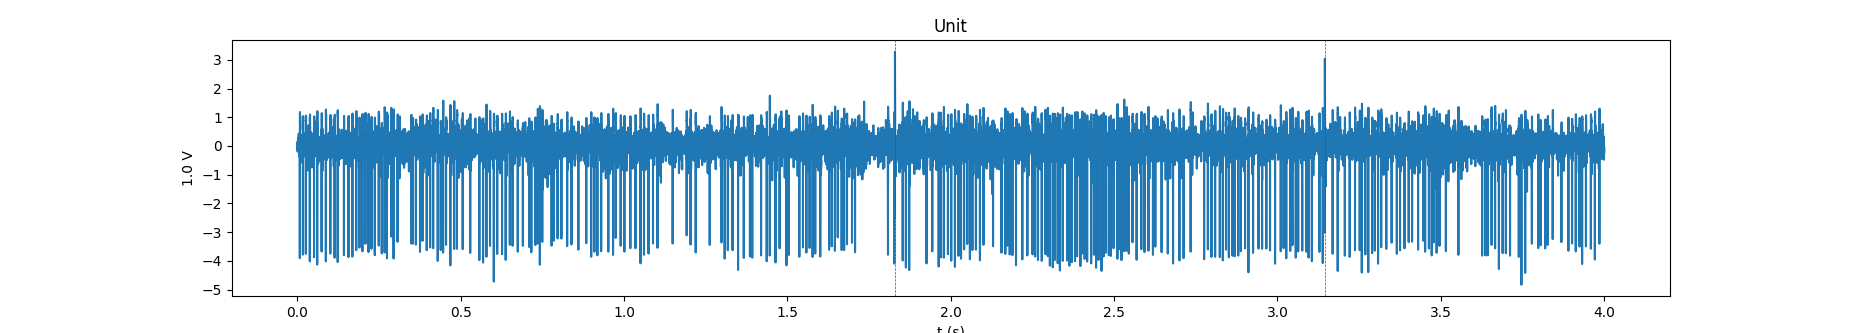

Text(0.5,0,u't (s)')

In [45]:


from kaveh.plots import plot_raster_overlaid_signal

ax = plot_raster_overlaid_signal(x, t, spike_train, color='r', linestyle='dashed', linewidth=0.5, zorder=5)

ax.set_title('{}'.format(analog_sig.annotations['channel_names'][0]))
ax.set_ylabel('{}'.format(str(analog_sig.units)))
ax.set_xlabel('t (s)')
